In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0"; 


In [2]:
import ktrain
from ktrain import text

Using TensorFlow backend.


Here, we will classify Wikipedia comments into one or more categories of so-called *toxic comments*.   Categories of toxic online behavior include toxic, severe_toxic, obscene, threat, insult, and identity_hate.  The dataset can be downloaded from the [Kaggle Toxic Comment Classification Challenge](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data) as a CSV file (i.e., download the file ```train.csv```).  We will load the data using the ```texts_from_csv``` method, which assumes the label_columns are already one-hot-encoded in the spreadsheet. Since *val_filepath* is None, 10% of the data will automatically be used as a validation set.


In [3]:
DATA_PATH = 'data/toxic-comments/train.csv'
NUM_WORDS = 50000
MAXLEN = 150
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_csv(DATA_PATH,
                      'comment_text',
                      label_columns = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"],
                      val_filepath=None, # if None, 10% of data will be used for validation
                      max_features=NUM_WORDS, maxlen=MAXLEN,
                      ngram_range=1)

Word Counts: 196995
Nrows: 143613
143613 train sequences
Average train sequence length: 66
15958 test sequences
Average test sequence length: 66
Pad sequences (samples x time)
x_train shape: (143613,150)
x_test shape: (15958,150)
y_train shape: (143613,6)
y_test shape: (15958,6)


In [4]:
model = text.text_classifier('fasttext', (x_train, y_train), 
                             preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test))

Is Multi-Label? True
compiling word ID features...
max_features is 49350
done.


simulating training for different learning rates... this may take a few moments...
Epoch 1/5
 47840/143613 [========>.....................] - ETA: 31s - loss: 0.4965 - acc: 0.7510

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


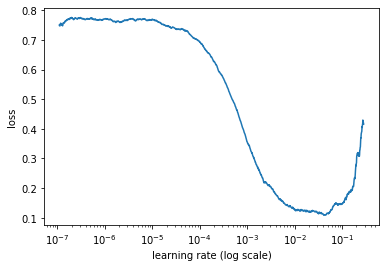

In [5]:
learner.lr_find()
learner.lr_plot()

In [6]:
learner.autofit(0.001)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 0.001...
Train on 143613 samples, validate on 15958 samples
Epoch 1/1024
143613/143613 [==============================] - 51s 356us/step - loss: 0.1358 - acc: 0.9530 - val_loss: 0.0536 - val_acc: 0.9817
Epoch 2/1024
143613/143613 [==============================] - 51s 355us/step - loss: 0.0643 - acc: 0.9784 - val_loss: 0.0504 - val_acc: 0.9826
Epoch 3/1024
143613/143613 [==============================] - 51s 356us/step - loss: 0.0577 - acc: 0.9797 - val_loss: 0.0483 - val_acc: 0.9831
Epoch 4/1024
143613/143613 [==============================] - 51s 352us/step - loss: 0.0540 - acc: 0.9806 - val_loss: 0.0475 - val_acc: 0.9830
Epoch 5/1024
143613/143613 [==============================] - 51s 355us/step - loss: 0.0520 - acc: 0.9811 - val_loss: 0.0471 - val_acc: 0.9832
Epoch 6/1024
143613/143613 [======================